In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM uniswap''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Uniswap,UNI,2020-09-18 23:59:59,8.438537,3.261757,3.488153,6.897257,6.061110e+09,6.681116e+08
1,2,Uniswap,UNI,2020-09-19 23:59:59,7.443275,5.321795,6.945577,5.724464,2.447471e+09,5.545076e+08
2,3,Uniswap,UNI,2020-09-20 23:59:59,6.050326,4.720210,5.720515,5.244195,1.554144e+09,5.079857e+08
3,4,Uniswap,UNI,2020-09-21 23:59:59,5.622155,4.160743,5.244195,4.266079,1.329464e+09,4.132392e+08
4,5,Uniswap,UNI,2020-09-22 23:59:59,4.554092,3.755040,4.275014,3.905138,8.162827e+08,3.782762e+08


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        292 non-null    object 
 1   Symbol      292 non-null    object 
 2   Date        292 non-null    object 
 3   High        292 non-null    float64
 4   Low         292 non-null    float64
 5   Open        292 non-null    float64
 6   Close       292 non-null    float64
 7   Volume      292 non-null    float64
 8   Marketcap   292 non-null    float64
 9   Range       292 non-null    float64
 10  Difference  292 non-null    float64
dtypes: float64(8), object(3)
memory usage: 25.2+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        292 non-null    object        
 1   Symbol      292 non-null    object        
 2   Date        292 non-null    datetime64[ns]
 3   High        292 non-null    float64       
 4   Low         292 non-null    float64       
 5   Open        292 non-null    float64       
 6   Close       292 non-null    float64       
 7   Volume      292 non-null    float64       
 8   Marketcap   292 non-null    float64       
 9   Range       292 non-null    float64       
 10  Difference  292 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 25.2+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,292.000000,292.000000,292.000000,292.000000,2.920000e+02,2.920000e+02,292.000000,292.000000
mean,18.091303,15.934440,17.014778,17.077256,1.061551e+09,7.950668e+09,2.156863,0.062478
std,13.471833,12.092454,12.802318,12.775789,9.518486e+08,7.319259e+09,2.214079,1.723834
min,2.160387,1.763817,1.930123,1.930119,1.893552e+08,2.712318e+08,0.125148,-11.643256
25%,3.931123,3.529418,3.762985,3.765402,5.059416e+08,8.483064e+08,0.526558,-0.477049
50%,19.537960,16.803973,18.144702,18.398028,7.634183e+08,6.104860e+09,1.680823,0.012941
75%,29.421740,26.685689,28.477360,28.397028,1.234958e+09,1.494493e+10,2.961048,0.546674
max,44.974063,41.576133,43.083324,43.164506,6.372858e+09,2.259162e+10,18.818770,9.067741


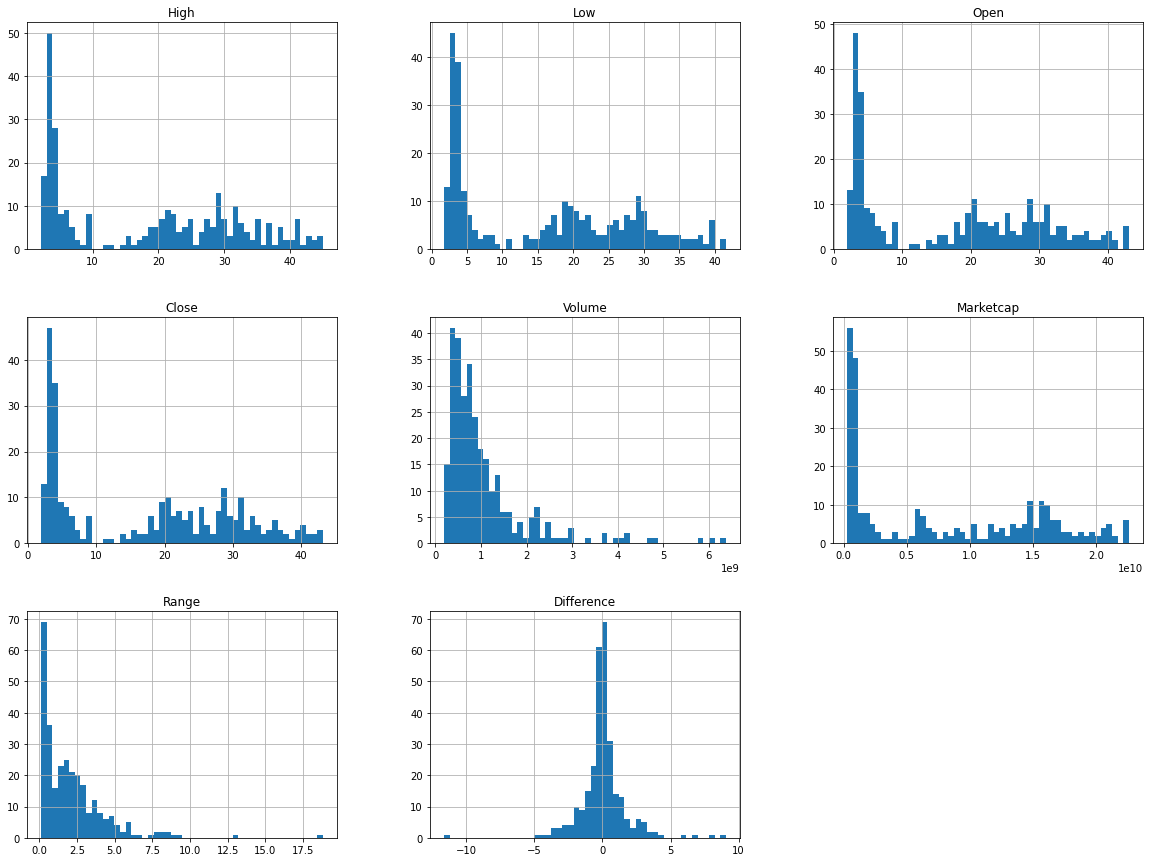

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,243,276,245,239,247,187,212,241,158,234
Date,2021-05-19 23:59:59,2021-06-21 23:59:59,2021-05-21 23:59:59,2021-05-15 23:59:59,2021-05-23 23:59:59,2021-03-24 23:59:59,2021-04-18 23:59:59,2021-05-17 23:59:59,2021-02-23 23:59:59,2021-05-10 23:59:59
Difference,-11.643256,-4.890868,-4.45425,-3.823182,-3.544252,-3.458939,-3.405849,-3.277327,-3.131569,-3.034453


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,155,248,206,170,250,134,219,220,0,182
Date,2021-02-20 23:59:59,2021-05-24 23:59:59,2021-04-12 23:59:59,2021-03-07 23:59:59,2021-05-26 23:59:59,2021-01-30 23:59:59,2021-04-25 23:59:59,2021-04-26 23:59:59,2020-09-18 23:59:59,2021-03-19 23:59:59
Difference,9.067741,7.891316,6.786365,5.762162,4.204756,3.784885,3.754664,3.607493,3.409104,3.245462


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

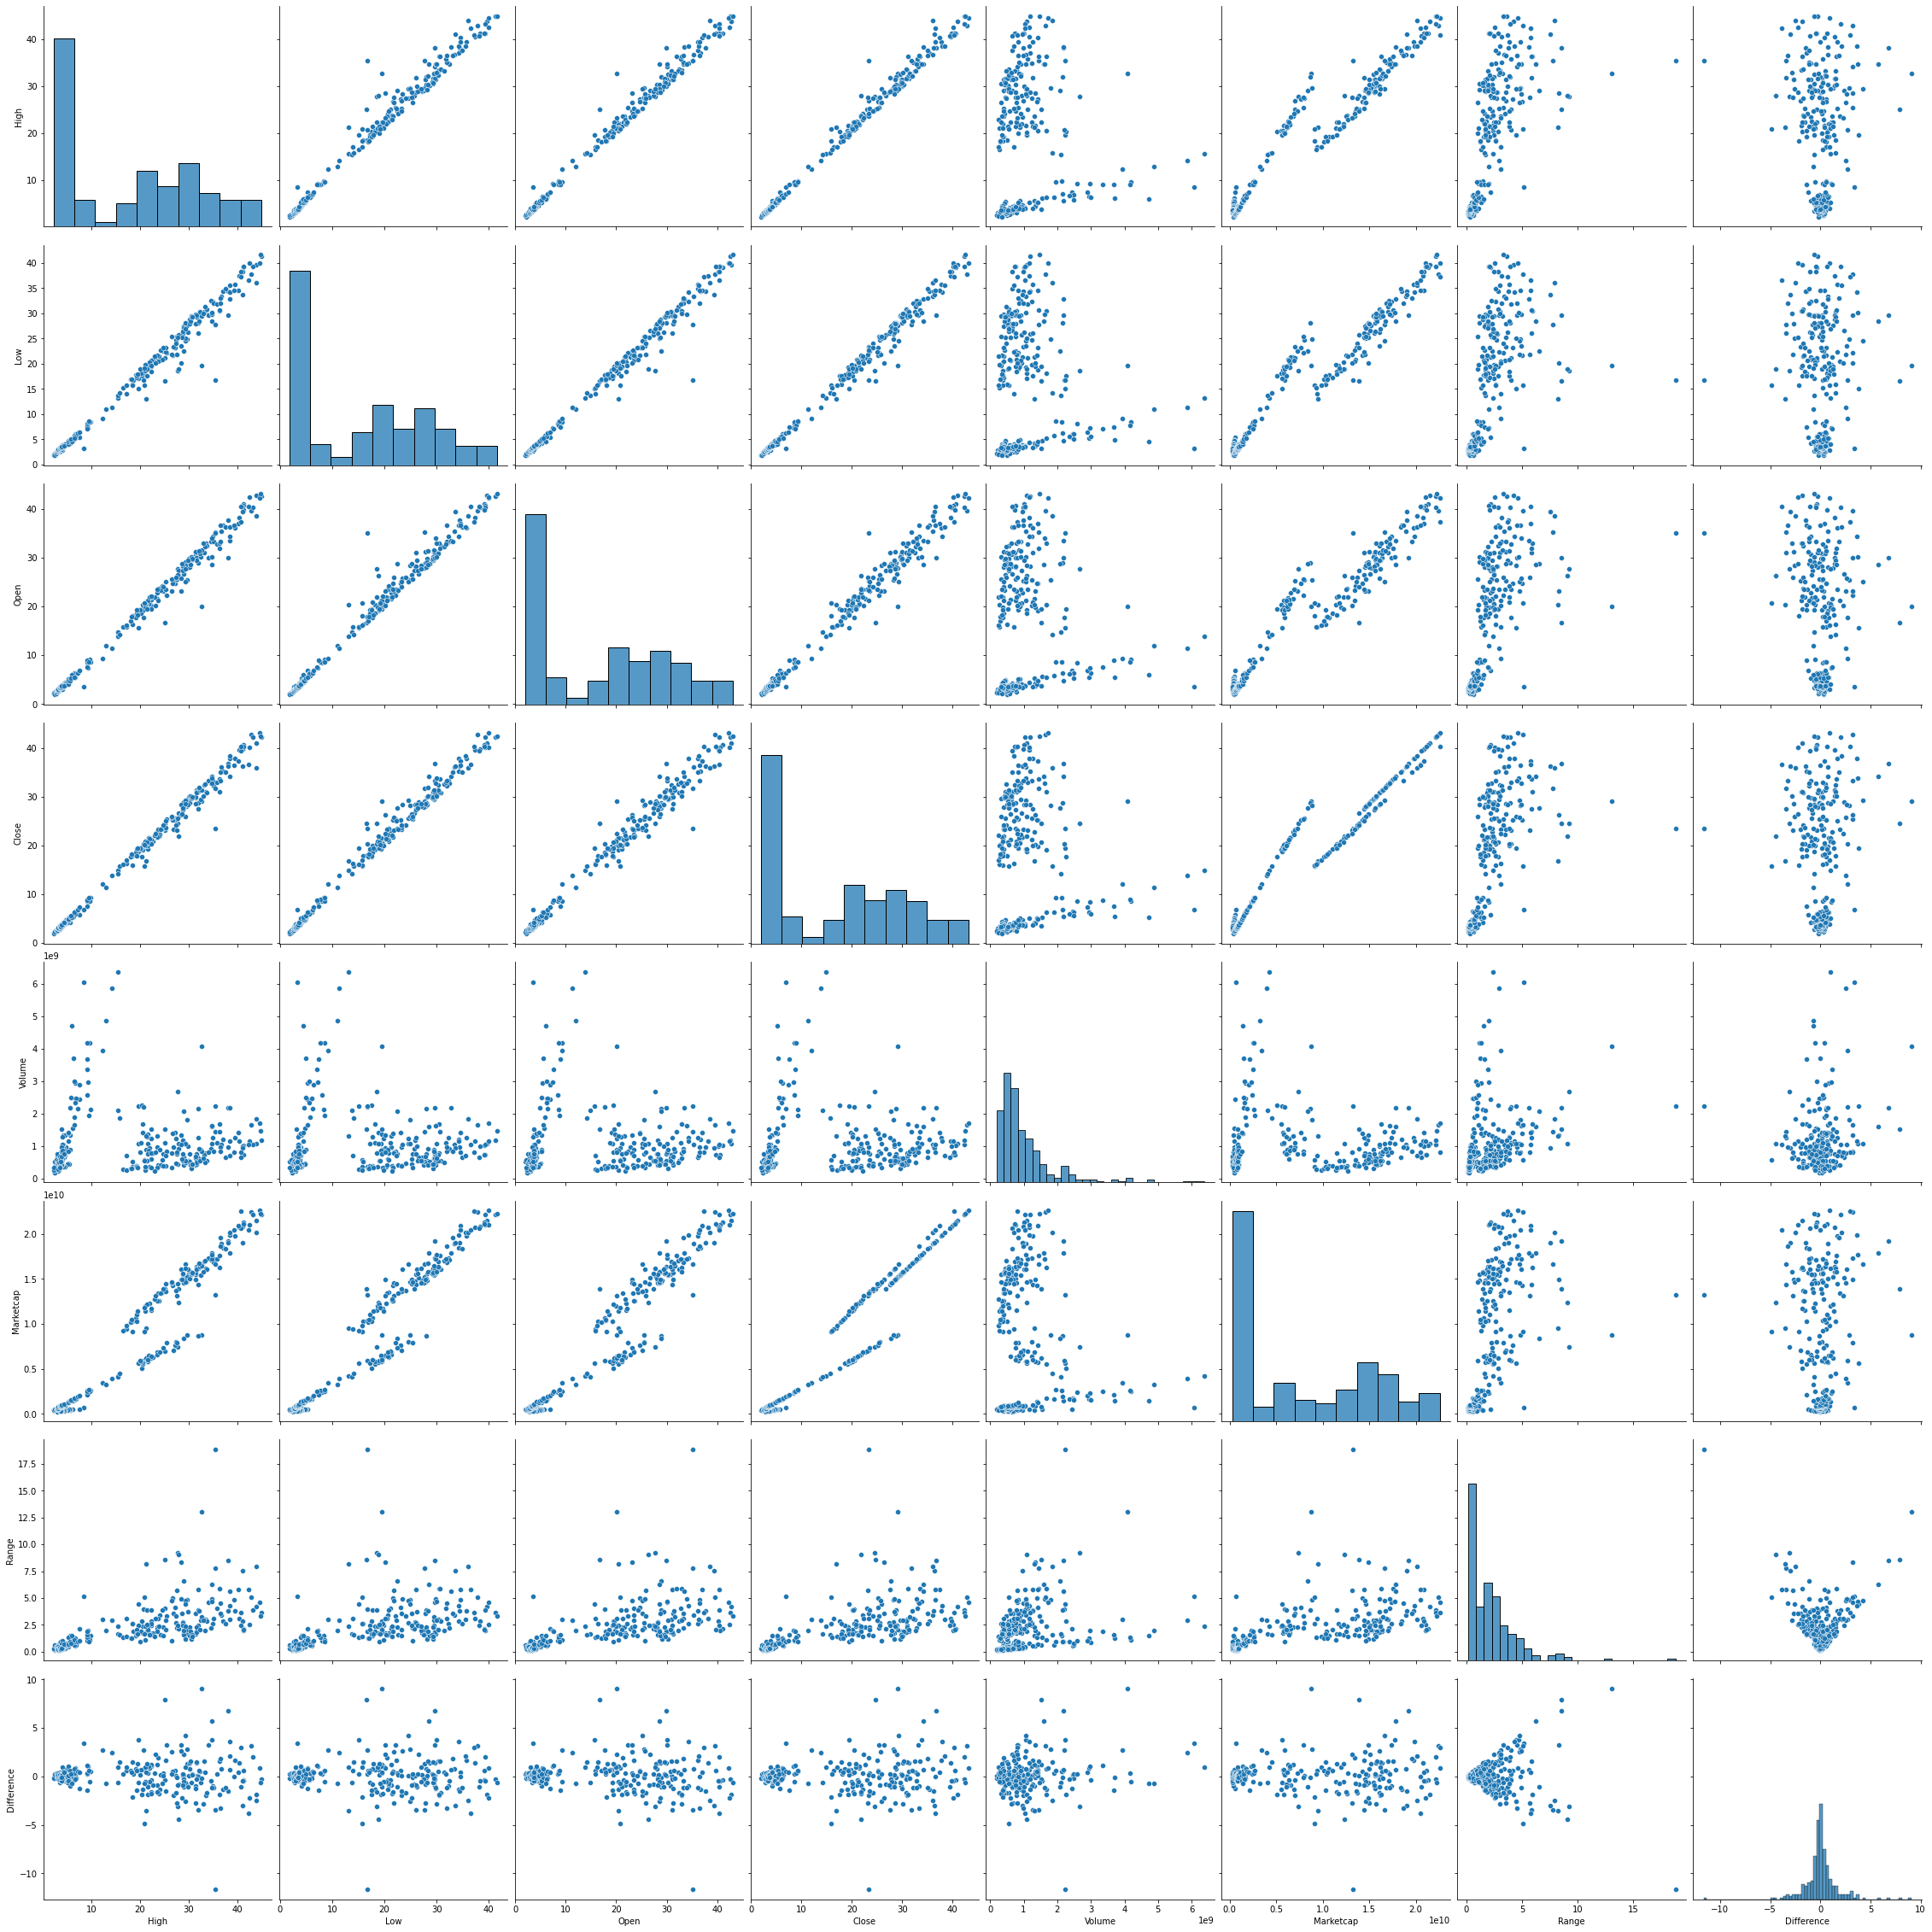

In [15]:
sns.pairplot(data,height=4);
